In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime, date
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import akshare as ak
# import tushare as ts
# ts.set_token('你自己的token')
# pro = ts.pro_api()
# import efinance as ef
# import baostock as bs
import tqdm

In [2]:
start_date=(date.today() - timedelta(days=3650)).strftime("%Y%m%d")
end_date=time.strftime("%Y%m%d",time.localtime())
# get_zs_price_day_sh('000001',start_date,end_date)
print(start_date,end_date)

20130613 20230611


In [3]:
index_zh_a_hist_df = ak.index_zh_a_hist(symbol="000300", period="daily", start_date='20000101', end_date=end_date)
index_zh_a_hist_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2005-01-04,994.77,982.79,994.77,980.66,7412868,4.431977e+09,0.00,0.00,0.00,0.03
1,2005-01-05,981.58,992.56,997.32,979.88,7119108,4.529208e+09,1.77,0.99,9.77,0.02
2,2005-01-06,993.33,983.17,993.79,980.33,6288029,3.921015e+09,1.36,-0.95,-9.39,0.02
3,2005-01-07,983.05,983.96,995.71,979.81,7298694,4.737469e+09,1.62,0.08,0.79,0.02
4,2005-01-10,983.76,993.88,993.96,979.79,5791697,3.762933e+09,1.44,1.01,9.92,0.02
...,...,...,...,...,...,...,...,...,...,...,...
4474,2023-06-05,3860.56,3844.25,3860.56,3832.46,116163989,2.111444e+11,0.73,-0.46,-17.58,0.40
4475,2023-06-06,3840.46,3808.16,3867.85,3802.84,125781258,2.220917e+11,1.69,-0.94,-36.09,0.43
4476,2023-06-07,3815.48,3789.34,3823.11,3780.10,98862432,1.898798e+11,1.13,-0.49,-18.82,0.34
4477,2023-06-08,3791.08,3820.19,3834.39,3777.78,118700934,1.991193e+11,1.49,0.81,30.85,0.40


In [4]:
N = 18
# 回归周期
stock_df=index_zh_a_hist_df
stock_df['rsrs'] = np.nan
# 初始化rsrs列
for i in range(N-1, len(stock_df)):
    x = stock_df['最低'].iloc[i-N+1:i+1].values
    # 取前N日最低价序列
    y = stock_df['最高'].iloc[i-N+1:i+1].values
    # 取前N日最高价序列
    beta = np.polyfit(x, y, deg=1)[0]
    # 计算线性回归的斜率值
    stock_df['rsrs'].iloc[i] = beta # 赋值给rsrs列1。

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
M=600
# 计算标准分，如果当前时间长度不够，则使用至少20交易日数据计算
stock_df['std_score'] = (stock_df['rsrs'] - stock_df['rsrs'].rolling(M).mean())/stock_df['rsrs'].rolling(M).std()

In [6]:
stock_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,rsrs,std_score
0,2005-01-04,994.77,982.79,994.77,980.66,7412868,4.431977e+09,0.00,0.00,0.00,0.03,NaN,NaN
1,2005-01-05,981.58,992.56,997.32,979.88,7119108,4.529208e+09,1.77,0.99,9.77,0.02,NaN,NaN
2,2005-01-06,993.33,983.17,993.79,980.33,6288029,3.921015e+09,1.36,-0.95,-9.39,0.02,NaN,NaN
3,2005-01-07,983.05,983.96,995.71,979.81,7298694,4.737469e+09,1.62,0.08,0.79,0.02,NaN,NaN
4,2005-01-10,983.76,993.88,993.96,979.79,5791697,3.762933e+09,1.44,1.01,9.92,0.02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,2023-06-05,3860.56,3844.25,3860.56,3832.46,116163989,2.111444e+11,0.73,-0.46,-17.58,0.40,0.996664,0.827711
4475,2023-06-06,3840.46,3808.16,3867.85,3802.84,125781258,2.220917e+11,1.69,-0.94,-36.09,0.43,1.006693,0.903298
4476,2023-06-07,3815.48,3789.34,3823.11,3780.10,98862432,1.898798e+11,1.13,-0.49,-18.82,0.34,0.997609,0.830336
4477,2023-06-08,3791.08,3820.19,3834.39,3777.78,118700934,1.991193e+11,1.49,0.81,30.85,0.40,0.961741,0.549589


In [7]:
# 只保留达到阈值的行
stock_df_new=stock_df[(stock_df['std_score'] < -0.7) | (stock_df['std_score'] > 0.7)]
stock_df_new=stock_df_new.reset_index(drop=True)
stock_df_new
# 保留所有行
# stock_df_new=stock_df.reset_index(drop=True)
# stock_df_new=stock_df_new.dropna(subset=['std_score'])
# stock_df_new

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,rsrs,std_score
0,2007-08-01,4479.30,4290.48,4496.25,4271.06,79361665,1.289112e+11,5.05,-3.81,-170.08,0.27,1.032195,0.901643
1,2007-08-02,4311.60,4436.19,4449.40,4303.98,62887538,1.083580e+11,3.39,3.40,145.71,0.21,1.042816,0.992746
2,2007-08-03,4472.89,4598.38,4599.25,4472.89,78190473,1.412875e+11,2.85,3.66,162.19,0.27,1.038069,0.947514
3,2007-08-10,4765.85,4726.68,4771.61,4631.04,74962881,1.235983e+11,2.94,-1.06,-50.61,0.26,1.019521,0.773566
4,2007-09-14,5362.46,5397.28,5405.85,5274.22,60295626,1.187392e+11,2.46,0.88,47.31,0.21,0.776735,-1.420923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-05-31,3827.16,3798.54,3827.16,3781.40,126387368,2.356061e+11,1.19,-1.02,-39.21,0.43,1.001143,0.865337
1708,2023-06-01,3788.59,3806.87,3832.21,3786.73,134561881,2.418295e+11,1.20,0.22,8.33,0.46,0.999603,0.852791
1709,2023-06-05,3860.56,3844.25,3860.56,3832.46,116163989,2.111444e+11,0.73,-0.46,-17.58,0.40,0.996664,0.827711
1710,2023-06-06,3840.46,3808.16,3867.85,3802.84,125781258,2.220917e+11,1.69,-0.94,-36.09,0.43,1.006693,0.903298


In [8]:
stock_df['收益'] = np.nan
stock_df['收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
stock_df['日均收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
for i in tqdm.trange(len(stock_df)):
    # 判断是否缺失
    if stock_df['std_score'].iloc[i]>-100:
        for j in range(i+1,len(stock_df)):
            x=stock_df['std_score'].iloc[i]
            y=stock_df['std_score'].iloc[j]

            # date_range = pd.date_range(start=stock_df_new['日期'].iloc[i], end=stock_df_new['日期'].iloc[j])
            # # 获取交易日历数据
            # trade_date_df = ak.tool_trade_date_hist_sina()
            # # 判断哪些日期是交易日
            # is_trade_date = date_range.isin(trade_date_df["trade_date"])
            # # 计算交易日的数量
            # trade_date_count = is_trade_date.sum()

            if (x<-0.7 and y>0.7) or (x>0.7 and y<-0.7):
                stock_df['收益'].iloc[i]=stock_df['收盘'].iloc[j]-stock_df['收盘'].iloc[i]
                stock_df['收益率'].iloc[i]=100*(stock_df['收盘'].iloc[j]-stock_df['收盘'].iloc[i])/stock_df['收盘'].iloc[i]
                stock_df['日均收益率'].iloc[i]=100*((stock_df['收盘'].iloc[j]-stock_df['收盘'].iloc[i])/stock_df['收盘'].iloc[i])/(j-i)
                break
            # elif j == len(stock_df_new)-1:
            #     stock_df_new['收益'].iloc[i]=stock_df_new['收盘'].iloc[j]-stock_df_new['收盘'].iloc[i]
            #     stock_df_new['收益率'].iloc[i]=100*(stock_df_new['收盘'].iloc[j]-stock_df_new['收盘'].iloc[i])/stock_df_new['收盘'].iloc[i]
            #     stock_df_new['日均收益率'].iloc[i]=100*((stock_df_new['收盘'].iloc[j]-stock_df_new['收盘'].iloc[i])/stock_df_new['收盘'].iloc[i])/(j-i)
            else:
                pass
        else:
            pass
stock_df

 14%|█▍        | 618/4479 [00:00<00:00, 4550.10it/s]D:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 4479/4479 [01:08<00:00, 65.34it/s] 


,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,rsrs,std_score,收益,收益率,日均收益率
0,2005-01-04,994.77,982.79,994.77,980.66,7412868,4.431977e+09,0.00,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN
1,2005-01-05,981.58,992.56,997.32,979.88,7119108,4.529208e+09,1.77,0.99,9.77,0.02,NaN,NaN,NaN,NaN,NaN
2,2005-01-06,993.33,983.17,993.79,980.33,6288029,3.921015e+09,1.36,-0.95,-9.39,0.02,NaN,NaN,NaN,NaN,NaN
3,2005-01-07,983.05,983.96,995.71,979.81,7298694,4.737469e+09,1.62,0.08,0.79,0.02,NaN,NaN,NaN,NaN,NaN
4,2005-01-10,983.76,993.88,993.96,979.79,5791697,3.762933e+09,1.44,1.01,9.92,0.02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,2023-06-05,3860.56,3844.25,3860.56,3832.46,116163989,2.111444e+11,0.73,-0.46,-17.58,0.40,0.996664,0.827711,NaN,NaN,NaN
4475,2023-06-06,3840.46,3808.16,3867.85,3802.84,125781258,2.220917e+11,1.69,-0.94,-36.09,0.43,1.006693,0.903298,NaN,NaN,NaN
4476,2023-06-07,3815.48,3789.34,3823.11,3780.10,98862432,1.898798e+11,1.13,-0.49,-18.82,0.34,0.997609,0.830336,NaN,NaN,NaN
4477,2023-06-08,3791.08,3820.19,3834.39,3777.78,118700934,1.991193e+11,1.49,0.81,30.85,0.40,0.961741,0.549589,NaN,NaN,NaN


In [9]:
stock_df_new=stock_df[stock_df['日均收益率']>-100]
# 添加新列
stock_df_new['flag'] = stock_df_new['std_score'].apply(lambda x: 1 if x >= 0.7 else -1)
stock_df_new

<ipython-input-9-d56574d3fb9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_new['flag'] = stock_df_new['std_score'].apply(lambda x: 1 if x >= 0.7 else -1)


,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,rsrs,std_score,收益,收益率,日均收益率,flag
622,2007-08-01,4479.30,4290.48,4496.25,4271.06,79361665,1.289112e+11,5.05,-3.81,-170.08,0.27,1.032195,0.901643,1106.80,25.796647,0.806145,1
623,2007-08-02,4311.60,4436.19,4449.40,4303.98,62887538,1.083580e+11,3.39,3.40,145.71,0.21,1.042816,0.992746,961.09,21.664762,0.698863,1
624,2007-08-03,4472.89,4598.38,4599.25,4472.89,78190473,1.412875e+11,2.85,3.66,162.19,0.27,1.038069,0.947514,798.90,17.373510,0.579117,1
629,2007-08-10,4765.85,4726.68,4771.61,4631.04,74962881,1.235983e+11,2.94,-1.06,-50.61,0.26,1.019521,0.773566,670.60,14.187548,0.567502,1
654,2007-09-14,5362.46,5397.28,5405.85,5274.22,60295626,1.187392e+11,2.46,0.88,47.31,0.21,0.776735,-1.420923,-624.61,-11.572681,-0.226915,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2023-03-23,3985.99,4039.09,4039.09,3984.00,158887421,2.964795e+11,1.38,0.99,39.65,0.54,0.988917,0.709934,11.84,0.293135,0.048856,1
4430,2023-03-29,4013.59,4006.14,4017.76,3992.67,133743510,2.638669e+11,0.63,0.17,6.63,0.46,0.996627,0.778343,44.79,1.118034,0.559017,1
4432,2023-03-31,4045.45,4050.93,4063.57,4039.96,138842546,2.798637e+11,0.58,0.31,12.40,0.47,0.730984,-1.246591,73.63,1.817607,0.151467,-1
4444,2023-04-19,4159.39,4124.56,4159.39,4118.63,162554592,3.122195e+11,0.98,-0.90,-37.47,0.55,0.992715,0.772994,-161.89,-3.925025,-0.981256,1


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-pa

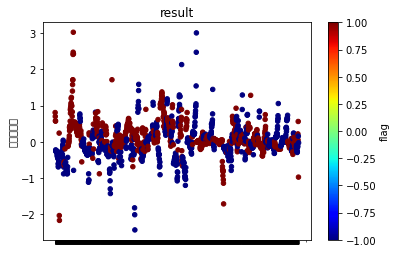

In [10]:
stock_df_new.plot.scatter('日期', '日均收益率', c='flag', colormap='jet')
plt.title('result')
plt.show()

In [11]:
from scipy.stats import ttest_ind
stock_df_ttest=stock_df_new[stock_df_new['日期']<='2018-01-01']
stock_df_ttest=stock_df_ttest[stock_df_ttest['日期']>='2013-01-01']
ttest_ind(stock_df_ttest[stock_df_ttest['flag']==1]['日均收益率'], stock_df_ttest[stock_df_ttest['flag']==-1]['日均收益率'])

Ttest_indResult(statistic=3.623241925479419, pvalue=0.000313935646859313)

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-pa

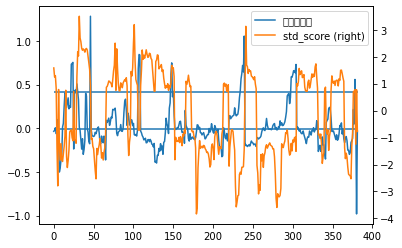

In [12]:
rsrs_y='日均收益率'
# 使用pandas.DataFrame.plot方法画折线图
df_plot=stock_df_new[stock_df_new['日期']>='2020-01-01']
df_plot=df_plot.reset_index(drop=True) #重新排列索引
df_plot=df_plot.dropna(subset=[rsrs_y,'std_score'])
ax = df_plot[[rsrs_y,'std_score']].plot(kind='line',secondary_y='std_score')
plt.hlines(y=0.7, xmin=0, xmax=len(df_plot))
plt.hlines(y=-0.7, xmin=0, xmax=len(df_plot))
plt.show()

In [13]:
# 相关性检验
pearson_r,pearson_p=stats.pearsonr(df_plot[rsrs_y],df_plot['std_score']) #相关系数和P值
spearman_r,spearman_p=stats.spearmanr(df_plot[rsrs_y],df_plot['std_score']) #相关系数和P值
print('pearson检验的r值和p值:',pearson_r,pearson_p,'spearman检验的r值和p值:',spearman_r,spearman_p)
if spearman_p<0.05:
    if spearman_r<0:
        print('有显著负相关性！')
    else:
        print('有显著正相关性！')
else:
    print('没有显著相关性！')

pearson检验的r值和p值: -0.15942544777665765 0.0017735514041537846 spearman检验的r值和p值: -0.18512434998979058 0.00027491584823327716
有显著负相关性！


只用了沪深300做了研究，RSRS策略目前已经失效了，不继续研究，但是显著负相关也很离谱。